In [2]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 62.1 MB/s eta 0:00:00


In [22]:
import rasterio

In [23]:
pip install rasterio==1.3.10

In [28]:
in_img = r'/content/data1/DEMNAS_1012-14_v1.0.tif'

In [29]:
ds = rasterio.open(in_img)
ds

<open DatasetReader name='/content/data1/DEMNAS_1012-14_v1.0.tif' mode='r'>

In [30]:
data = ds.read()
data

array([[[35.650055, 35.539497, 35.24941 , ..., 41.362144, 41.490757,
         42.15912 ],
        [35.381134, 35.009182, 34.539097, ..., 41.809402, 41.989742,
         42.48589 ],
        [34.533604, 33.840813, 33.105965, ..., 42.105637, 42.373722,
         42.709583],
        ...,
        [93.01968 , 93.03663 , 92.90841 , ..., 82.40416 , 81.63951 ,
         82.59355 ],
        [92.662834, 92.73138 , 92.710365, ..., 82.584114, 81.774086,
         82.783966],
        [92.3034  , 92.3967  , 92.43149 , ..., 83.23775 , 82.14222 ,
         82.83768 ]]], dtype=float32)

In [31]:
ds.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': nan,
 'width': 3333,
 'height': 3333,
 'count': 1,
 'crs': None,
 'transform': Affine(7.500750075007501e-05, 0.0, 103.75,
        0.0, -7.500750075007501e-05, -3.5)}

In [32]:
ds.name

'/content/data1/DEMNAS_1012-14_v1.0.tif'

In [33]:
ds.count

1

In [34]:
ds.shape

(3333, 3333)

In [35]:
ds.width

3333

In [36]:
ds.driver

'GTiff'

In [37]:
ds.crs

In [38]:
ds.transform

Affine(7.500750075007501e-05, 0.0, 103.75,
       0.0, -7.500750075007501e-05, -3.5)

In [39]:
ds.descriptions

(None,)

In [40]:
data.size

11108889

In [41]:
data.dtype

dtype('float32')

In [42]:
data.min

<function ndarray.min>

In [43]:
data.max

<function ndarray.max>

In [44]:
from rasterio.plot import show

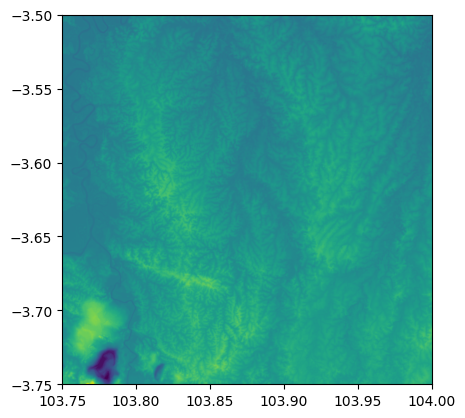

<Axes: >

In [45]:
show(ds)

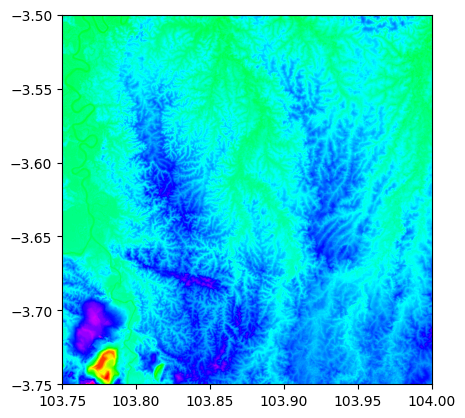

<Axes: >

In [46]:
show(ds, cmap='hsv')

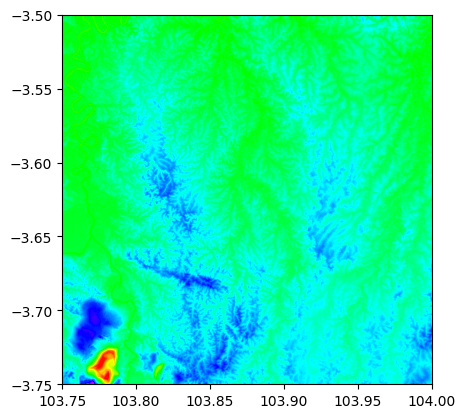

<Axes: >

In [47]:
show(ds, cmap='gist_rainbow')

In [48]:
from rasterio.plot import show_hist

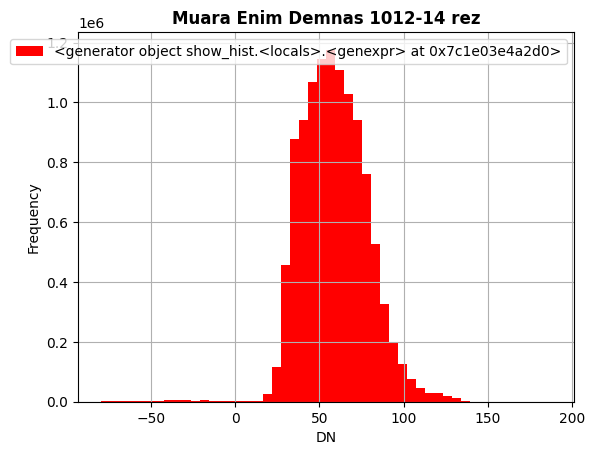

<function rasterio.plot.show_hist(source, bins=10, masked=True, title='Histogram', ax=None, label=None, **kwargs)>

In [49]:
show_hist(ds, bins=50, title='Muara Enim Demnas 1012-14 rez')
show_hist

In [52]:
import numpy as np

In [54]:
with rasterio.open(r"/content/output1/DEMNAS_1012-14_OUTPUT1.tif", 'w',
                   driver=ds.driver,
                   width=ds.width,
                   height=ds.height,
                   count=ds.count,
                   crs=ds.crs,
                   transform=ds.transform,
                   dtype=data.dtype) as dst:
    dst.write(data)

In [56]:
ds_out = rasterio.open(r"/content/output1/DEMNAS_1012-14_OUTPUT1.tif")

In [57]:
pip install fiona

In [58]:
import fiona
import rasterio.mask

In [59]:
with fiona.open('/content/data1/SUNGAI_AR_50K.shp', 'r') as shapefile:
        for feature in shapefile:
          shapes = [feature['geometry']]

In [60]:
with rasterio.open('/content/data1/DEMNAS_1012-14_v1.0.tif') as src:
  out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
  out_meta = src.meta
  out_meta.update({"driver": "GTiff",
                    "height": out_image.shape[1],
                    "width": out_image.shape[2],
                    "transform": out_transform})

In [64]:
with rasterio.open('/content/output1/SUNGAI_AR_50K_OUTPUT1.tif', 'w', **out_meta) as dest:
  dest.write(out_image)

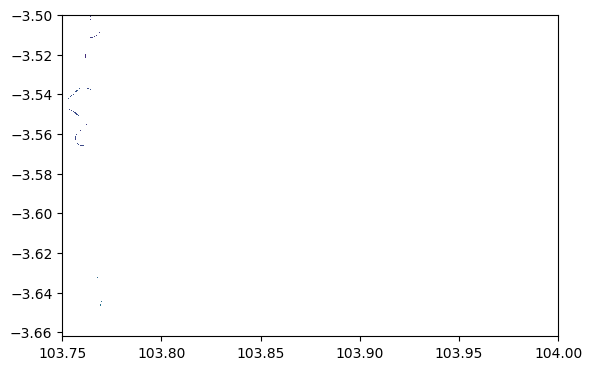

<Axes: >

In [66]:
show(rasterio.open('/content/output1/SUNGAI_AR_50K_OUTPUT1.tif'))

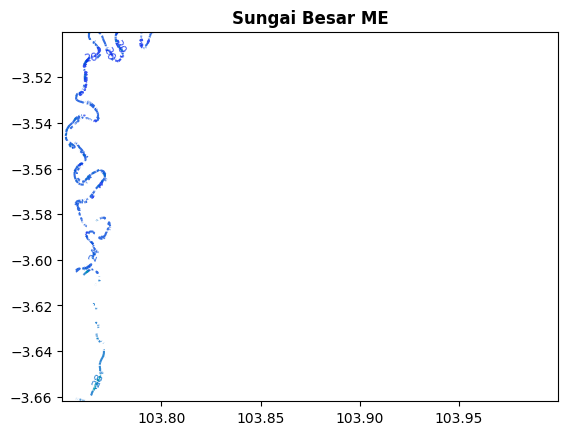

<Axes: title={'center': 'Sungai Besar ME'}>

In [84]:
show(rasterio.open('/content/output1/SUNGAI_AR_50K_OUTPUT1.tif'), cmap='winter', contour=True, contour_label_kws=None, ax=None, title="Sungai Besar ME", transform=None, adjust=True)